# Average Monthly Rent

**Casey Leedom and Tiffany Green**

This assignment uses data from the Barcelona City Hall Open Data site regarding average monthly rent and average monthly rent/m^2 by neighborhood in Barcelona. Data was analyzed to determine the rise in rent between the years 2014-2018. The assignment also pulls in 2018 Average Demand Rental Price and Average Offer Rental Price from the Barcelona Housing Observatory (O-HB) site. 

For this assignment, we were tasked with updating our midterm jupyter notebooks to use functions and loops so that the commands ran more efficiently. In this notebook, and in the population data notebook, we implemented functions and for loops to clean multiple datasets before merging them. 

## Initial Module Imports and File Loads
In this section, we load in various python modules and load in our data files. 

### Import python modules

These modules will help us create graphics and work with dataframes and geodataframes. 

In [1]:
# Import geopandas
import geopandas as gpd

# and regular pandas
import pandas as pd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# for interactive maps
import plotly.express as px

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### Bring in data files

data file #1: spatial data file including geometry for neighborhoods

data files #2-7: data files for average monthly rent (2014-2019)

data files #8-9: data files for average demand and offer rental price (2018)

In [2]:
bb = gpd.read_file('Data/shapefiles_barrio_barcelona.geojson')

In [3]:
amr2014 = gpd.read_file('Data/2014_Average monthly rent_Barcelona.csv')
amr2015 = gpd.read_file('Data/2015_Average monthly rent_Barcelona.csv')
amr2016 = gpd.read_file('Data/2016_Average monthly rent_Barcelona.csv')
amr2017 = gpd.read_file('Data/2017_Average monthly rent_Barcelona.csv')
amr2018 = gpd.read_file('Data/2018_Average monthly rent_Barcelona.csv')
amr2019 = gpd.read_file('Data/2019_Average monthly rent_Barcelona.csv')

amrlist = [amr2014, amr2015, amr2016, amr2017, amr2018, amr2019]

In [4]:
adrp2018 = gpd.read_file('Data/Housing Market_Average demand rental price_2018_barri.csv')
aorp2018 = gpd.read_file('Data/Housing Market_Average offer rental price_2018_barri.csv')

arplist = [adrp2018, aorp2018]

## Data Clean Up

### Clean up data file #1: spatial data

We've worked with this dataframe before. It needs to be trimmed to only include the columns: c_barri, n_barri, and geometry.  

In [5]:
# Trim the dataframe so that we just have the number of the neighborhood, name of the neighborhood (for backchecking),
# and the geometry. Print the first 5 rows to test. 

bb_tr = bb[['c_barri','n_barri','geometry']]
bb_tr.head()

,c_barri,n_barri,geometry
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,la Marina del Prat Vermell,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."


This looks clean - just the data we need. 

### Clean up data files #2-7: 2014-2019 Average Monthly Rent Data

We've streamlined the data cleanup to have the same steps for each year, 2014-2019. The one difference is that the 2019 data has "N/A" values, whereas the 2014-2018 data have "NA" values. We've used query to eliminate this data in this section, so that it does not mess with our statistics later. 

This section has been updated to include functions and for loops to simplify the clean up process. A couple items to note for future notebooks:
1. These functions could probably be combined further. 
1. We had trouble modifying existing dataframes within a list, so some for loops create new lists of dataframes instead. 

#### Separate data

First we need to separate the monthly rent data from the monthly rent/m^2

In [6]:
amr2014.sample(5)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,geometry
12,2014,1,3,Sants-Montjuïc,13,la Marina de Port,Lloguer mitjà mensual (Euros/mes),553.55,None
36,2014,1,7,Horta-Guinardó,37,el Carmel,Lloguer mitjà mensual (Euros/mes),478.7,None
211,2014,3,10,Sant Martí,66,el Parc i la Llacuna del Poblenou,Lloguer mitjà mensual (Euros/mes),739.94,None
391,2014,2,5,Sarrià-Sant Gervasi,27,el Putxet i el Farró,Lloguer mitjà per superfície (Euros/m2 mes),11.32,None
6,2014,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),921.4,None


In [7]:
# function to separate out monthly rent data from the monthly rent / m^2 data. 

def separate(df):
    a = df.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
    return a

def separate2(df):
    b = df.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")
    return b

In [8]:
# for loop to run through these separate functions. This will create two new lists of dataframes: one for monthly rent
# data and one for monthly rent/m^2. 

df_m2 = []
df_t = []

for df in amrlist:
    a = separate(df)
    df_m2.append(a)
    b = separate2(df)
    df_t.append(b)

#### Remove null data

We want to check for any NA, N/A, NaN values in our data, so we can remove these from our dataset. 

In [9]:
# function to drop null values from dataframes

def dropnull(df):
    col = df.columns[7]
    df = df[df[col] != 'NA']
    df = df[df[col] != 'N/A']
    return df

In [10]:
# for loops to drop null values from dataframes

df_t_2 = []
df_m2_2 = []

for df in df_t:
    a = dropnull(df)
    df_t_2.append(a)
    
for df in df_m2:
    a = dropnull(df)
    df_m2_2.append(a)

#### Convert datatypes 

We will need c_barri as an integer and Average monthly rent as a float in order to merge dataframes and complete calculations later on.

In [11]:
# create a function to convert data types to integer and float

def datatype(df):
    df.iloc[:,4] = df.iloc[:,4].astype(int)
    df.iloc[:,7] = df.iloc[:,7].astype(float) 

In [12]:
# for loop to convert data types to integer and float

for df in df_t_2:
    datatype(df)
    
for df in df_m2_2:
    datatype(df)

Note: we were able to convert datatypes within the existing lists of dataframes, without creating new lists. This was an issue we had elsewhere.

#### Group Data in order collapse quarterly averages into annual average

We previously used a pivot function to combine quarterly data, but this is much easier! The groupby function allows us to collapse rows based on a common parameter. We also used .mean() to take the average of the grouped rows, since we want average monthly rent for the year. 

In [13]:
#pdfa= df_t_tr2[1].groupby(['c_barri', 'n_barri']).mean()[['2015 Average Monthly Rent (Euros)']]

df_t_3 = []
df_m2_3 = []

for df in df_t_2:
    a = df.groupby(['Any','Codi_Barri', 'Nom_Barri']).mean()[['Preu']]
    b = a.reset_index()
    df_t_3.append(b)
    
for df in df_m2_2:
    a = df.groupby(['Any','Codi_Barri', 'Nom_Barri']).mean()[['Preu']]
    b = a.reset_index()
    df_m2_3.append(b)

#### Trim

Then we'll trim the data to keep just the columns we need moving forward

In [14]:
# function to trim data and change column names. Here is where we create a custom column name for each dataframe. 
def trimdata(df):
    x = df.iloc[0][0]
    columns_to_keep = ['Codi_Barri', 'Preu']
    df = df[columns_to_keep]
    df.columns = ['c_barri', str(x)+ ' Average Monthly Rent (Euros)']
    return df

def trimdatam2(df):
    x = df.iloc[0][0]
    columns_to_keep = ['Codi_Barri', 'Preu']
    df = df[columns_to_keep]
    df.columns = ['c_barri', str(x)+ ' Average Monthly Rent (Euros/m^2)']
    return df

In [15]:
# Use for loops to trim data. Here we used two new lists to fill with the trimmed dataframes. 

df_m2_tr = []
df_t_tr = []

# call the function with a loop
for df in df_m2_3:
    a = trimdatam2(df)
    df_m2_tr.append(a)
    
for df in df_t_3:
    a = trimdata(df)
    df_t_tr.append(a)

In [16]:
df_t_tr[0].head()

,c_barri,2014 Average Monthly Rent (Euros)
0,1,578.4075
1,2,748.5000
2,3,563.8125
3,4,684.2125
4,5,724.5200


### Create a separate dataframe that has a "year" column

In [17]:
# Start with df_t_3 and df_m2_3
df_t_3[0].head()

,Any,Codi_Barri,Nom_Barri,Preu
0,2014,1,el Raval,578.4075
1,2014,2,el Barri Gòtic,748.5000
2,2014,3,la Barceloneta,563.8125
3,2014,4,"Sant Pere, Santa Caterina i la Ribera",684.2125
4,2014,5,el Fort Pienc,724.5200


In [18]:
df_m2_3[0].head()

,Any,Codi_Barri,Nom_Barri,Preu
0,2014,1,el Raval,10.4825
1,2014,2,el Barri Gòtic,10.5400
2,2014,3,la Barceloneta,15.1525
3,2014,4,"Sant Pere, Santa Caterina i la Ribera",11.2300
4,2014,5,el Fort Pienc,9.9825


In [19]:
inflation = [1.0, 1.0002, 1.0157, 1.011, 1.0118, 1.0079]
inflation_adjust = [inflation[0],
                 inflation[0]*inflation[1],
                 inflation[0]*inflation[1]*inflation[2],
                 inflation[0]*inflation[1]*inflation[2]*inflation[3],
                 inflation[0]*inflation[1]*inflation[2]*inflation[3]*inflation[4],
                 inflation[0]*inflation[1]*inflation[2]*inflation[3]*inflation[4]*inflation[5]]

In [20]:
inflation_adjust

[1.0,
 1.0002,
 1.01590314,
 1.0270780745399999,
 1.0391975958195718,
 1.0474072568265465]

In [21]:
count = 0
for df in df_t_3:
    df['Preu_adjust']=df['Preu']/inflation_adjust[count]
    count = count+1
    
count = 0
for df in df_m2_3:
    df['Preu_adjust']=df['Preu']/inflation_adjust[count]
    count = count+1

In [22]:
df_t_3

[     Any  Codi_Barri                                     Nom_Barri      Preu  \
 0   2014           1                                      el Raval  578.4075   
 1   2014           2                                el Barri Gòtic  748.5000   
 2   2014           3                                la Barceloneta  563.8125   
 3   2014           4         Sant Pere, Santa Caterina i la Ribera  684.2125   
 4   2014           5                                 el Fort Pienc  724.5200   
 ..   ...         ...                                           ...       ...   
 65  2014          69  Diagonal Mar i el Front Marítim del Poblenou  927.8350   
 66  2014          70                         el Besòs i el Maresme  481.3075   
 67  2014          71                       Provençals del Poblenou  639.6650   
 68  2014          72                      Sant Martí de Provençals  634.0650   
 69  2014          73                           la Verneda i la Pau  565.0600   
 
     Preu_adjust  
 0     

In [23]:
df_t_3[5].head()

,Any,Codi_Barri,Nom_Barri,Preu,Preu_adjust
0,2019,1,el Raval,850.900,812.386963
1,2019,2,el Barri Gòtic,1098.775,1049.042760
2,2019,3,la Barceloneta,894.975,854.467061
3,2019,4,"Sant Pere, Santa Caterina i la Ribera",996.725,951.611700
4,2019,5,el Fort Pienc,1010.400,964.667748


In [24]:
df_m2_3[5].head()

,Any,Codi_Barri,Nom_Barri,Preu,Preu_adjust
0,2019,1,el Raval,14.325,13.676629
1,2019,2,el Barri Gòtic,14.275,13.628892
2,2019,3,la Barceloneta,17.400,16.612449
3,2019,4,"Sant Pere, Santa Caterina i la Ribera",15.175,14.488156
4,2019,5,el Fort Pienc,14.000,13.366339


In [25]:
# function to trim data and change column names. Here is where we create a custom column name for each dataframe. 
def trimdata_yr(df):
    columns_to_keep = ['Any','Codi_Barri', 'Preu','Preu_adjust']
    df = df[columns_to_keep]
    df.columns = ['Year','c_barri','Average Monthly Rent (Euros)','Adjusted Average Monthly Rent (Euros)']
    return df

def trimdatam2_yr(df):
    columns_to_keep = ['Any','Codi_Barri', 'Preu','Preu_adjust']
    df = df[columns_to_keep]
    df.columns = ['Year','c_barri','Average Monthly Rent (Euros/m^2)','Adjusted Average Monthly Rent (Euros/m^2)']
    return df

In [26]:
# Use for loops to trim data. Here we used two new lists to fill with the trimmed dataframes. 

df_m2_y_tr = []
df_t_y_tr = []

# call the function with a loop
for df in df_m2_3:
    a = trimdatam2_yr(df)
    df_m2_y_tr.append(a)
    
for df in df_t_3:
    a = trimdata_yr(df)
    df_t_y_tr.append(a)

In [27]:
df_m2_y_tr[0].head()

,Year,c_barri,Average Monthly Rent (Euros/m^2),Adjusted Average Monthly Rent (Euros/m^2)
0,2014,1,10.4825,10.4825
1,2014,2,10.5400,10.5400
2,2014,3,15.1525,15.1525
3,2014,4,11.2300,11.2300
4,2014,5,9.9825,9.9825


In [28]:
df_t_spa = [] 
df_m2_spa = []

for df in df_t_y_tr:
    a = bb_tr.merge(df, on='c_barri')
    df_t_spa.append(a)
    
for df in df_m2_y_tr:
    a = bb_tr.merge(df, on='c_barri')
    df_m2_spa.append(a)    

In [29]:
df_t_spa[0].head()

,c_barri,n_barri,geometry,Year,Average Monthly Rent (Euros),Adjusted Average Monthly Rent (Euros)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",2014,1157.9125,1157.9125
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",2014,1039.5050,1039.5050
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",2014,940.0200,940.0200
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",2014,567.8525,567.8525
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",2014,578.4075,578.4075


In [30]:
df_m2_spa[0].head()

,c_barri,n_barri,geometry,Year,Average Monthly Rent (Euros/m^2),Adjusted Average Monthly Rent (Euros/m^2)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",2014,9.7025,9.7025
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",2014,13.5175,13.5175
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",2014,11.5575,11.5575
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",2014,8.9350,8.9350
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",2014,10.4825,10.4825


### Create two dataframes 

In [31]:
list(df_t_spa)

[    c_barri                                        n_barri  \
 0        22          Vallvidrera, el Tibidabo i les Planes   
 1        23                                        SarriÃ    
 2        25                     Sant Gervasi - la Bonanova   
 3        43                                          Horta   
 4         1                                       el Raval   
 ..      ...                                            ...   
 65       59                                  el Bon Pastor   
 66       73                            la Verneda i la Pau   
 67       60                                    Sant Andreu   
 68       69  Diagonal Mar i el Front MarÃ­tim del Poblenou   
 69       70                         el BesÃ²s i el Maresme   
 
                                              geometry  Year  \
 0   MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...  2014   
 1   MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...  2014   
 2   MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.

In [32]:
rent_tot = df_t_spa[0].append(
    df_t_spa[1].append(
        df_t_spa[2].append(
            df_t_spa[3].append(
                df_t_spa[4].append(
                    df_t_spa[5],ignore_index=True),
                ignore_index=True),
            ignore_index=True),
        ignore_index=True),
    ignore_index=True)

rent_m2 = df_m2_spa[0].append(
    df_m2_spa[1].append(
        df_m2_spa[2].append(
            df_m2_spa[3].append(
                df_m2_spa[4].append(
                    df_m2_spa[5],ignore_index=True),
                ignore_index=True),
            ignore_index=True),
        ignore_index=True),
    ignore_index=True)

In [33]:
rent_tot

,c_barri,n_barri,geometry,Year,Average Monthly Rent (Euros),Adjusted Average Monthly Rent (Euros)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",2014,1157.9125,1157.912500
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",2014,1039.5050,1039.505000
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",2014,940.0200,940.020000
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",2014,567.8525,567.852500
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",2014,578.4075,578.407500
...,...,...,...,...,...,...
416,59,el Bon Pastor,"MULTIPOLYGON (((2.20834 41.42868, 2.20673 41.4...",2019,683.1750,652.253453
417,73,la Verneda i la Pau,"MULTIPOLYGON (((2.20834 41.42868, 2.20830 41.4...",2019,778.4750,743.240029
418,60,Sant Andreu,"MULTIPOLYGON (((2.19835 41.44873, 2.19777 41.4...",2019,805.1250,768.683809
419,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4...",2019,1381.8250,1319.281484


In [34]:
rent_tot['Average Monthly Rent (Euros)'] = round(rent_tot['Average Monthly Rent (Euros)'],2)
rent_tot['Adjusted Average Monthly Rent (Euros)'] = round(rent_tot['Adjusted Average Monthly Rent (Euros)'],2)


rent_m2['Average Monthly Rent (Euros/m^2)'] = round(rent_m2['Average Monthly Rent (Euros/m^2)'],2)
rent_m2['Adjusted Average Monthly Rent (Euros/m^2)'] = round(rent_m2['Adjusted Average Monthly Rent (Euros/m^2)'],2)

rent_tot.head()

,c_barri,n_barri,geometry,Year,Average Monthly Rent (Euros),Adjusted Average Monthly Rent (Euros)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",2014,1157.91,1157.91
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",2014,1039.51,1039.51
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",2014,940.02,940.02
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",2014,567.85,567.85
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",2014,578.41,578.41


In [ ]:
rent_tot_n = rent_tot.set_index('n_barri')

fig = px.choropleth_mapbox(rent_tot_n, geojson=rent_tot_n.geometry, color="Adjusted Average Monthly Rent (Euros)",
                           color_continuous_scale="Greens", range_color=[200, 1800],
                           locations=rent_tot_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri"},
                           center={"lat": 41.3851, "lon": 2.1734},
                           opacity=0.7,
                           animation_frame="Year",
                           title='Adjusted Average Monthly Rent (Euros): 2014-2019',
                           mapbox_style="carto-positron", zoom=10)
                            
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.write_html("Output/2014-2019_Adjusted_Average_Monthly_Rent_(Euros)_Map.html")
fig.show()

In [ ]:
rent_m2_n = rent_m2.set_index('n_barri')

fig = px.choropleth_mapbox(rent_m2_n, geojson=rent_m2_n.geometry, color="Adjusted Average Monthly Rent (Euros/m^2)",
                           color_continuous_scale="Greens", range_color=[4, 20],
                           locations=rent_m2_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri"},
                           center={"lat": 41.3851, "lon": 2.1734},
                           opacity=0.7,
                           animation_frame="Year",
                           title='Adjusted Average Monthly Rent (Euros/m^2): 2014-2019',
                           mapbox_style="carto-positron", zoom=10)
                            
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.write_html("Output/2014-2019_Adjusted_Average_Monthly_Rent_(Euros per m2)_Map.html")
fig.show()

### Clean up data files #8-9: Average demand and offer rental price data

This data is only for 2018, at the barri level. We removed the district, municipal, and ambit data outside of python, and added a c_barri column for merging. We'll end up comparing this data to the average monthly rent for 2018. 

Since there are only two data files here, we did not use any functions. 

In [35]:
# query data to check if there are any null values. I assume not, since we already have 68 barris instead of 73. 
adrp2018.query("`val_valor` == 'NaN'")

,ter_nom,c_barri,ter_nivell,dat_data,val_valor,geometry


In [36]:
# Trim the adrp data to only include ter_nom and val_valor
adrp2018_tr = adrp2018[['ter_nom', 'c_barri','val_valor']]
# Rename columns 
adrp2018_tr.columns = ['n_barri', 'c_barri','2018 Average Demand Rental Price (Euros)']

# Trim the aorp data to only include ter_nom and val_valor
aorp2018_tr = aorp2018[['ter_nom', 'c_barri','val_valor']]
# Rename columns
aorp2018_tr.columns = ['n_barri', 'c_barri','2018 Average Offer Rental Price (Euros)']

## Combine dataframes, add geometry

This took a lot of trial and error initially, but we've got a better system now - the merge command! Because I set up each dataframe with c_barri, we can use that column as a common element to merge. 

### Combine the Average monthly rent data with the geojson file

In [37]:
# Combine the dataframes for 2014-2019 (can we do it one nested command?? yes we can!)
# Note: here we are grabbing dataframes from two lists of dataframes. 

amr_fin = df_t_tr[0].merge(df_m2_tr[0].merge(df_t_tr[1].merge(df_m2_tr[1].merge(df_t_tr[2].merge(df_m2_tr[2].merge(df_t_tr[3].merge(df_m2_tr[3].merge(df_t_tr[4].merge(df_m2_tr[4].merge(df_t_tr[5].merge(df_m2_tr[5],on='c_barri'),on='c_barri'), on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri')
                                                                                                                                                                                                                                                                                                         

In [38]:
# Combine the rent data with the spatial data for barris - learned that it's important to do bb first! merge the
# non-spatial data into the spatial data

amr_spa = bb_tr.merge(amr_fin, on='c_barri')

In [39]:
amr_spa

,c_barri,n_barri,geometry,2014 Average Monthly Rent (Euros),2014 Average Monthly Rent (Euros/m^2),2015 Average Monthly Rent (Euros),2015 Average Monthly Rent (Euros/m^2),2016 Average Monthly Rent (Euros),2016 Average Monthly Rent (Euros/m^2),2017 Average Monthly Rent (Euros),2017 Average Monthly Rent (Euros/m^2),2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2),2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",1157.9125,9.7025,1030.0475,12.1975,1177.1075,15.3125,1231.0100,16.6600,939.1125,12.0675,1200.150,13.775
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",1039.5050,13.5175,1100.4075,14.4050,1188.0025,15.9475,1353.5350,17.4475,1362.0175,17.1825,1369.950,16.825
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",940.0200,11.5575,1039.9675,12.6550,1123.6225,14.2175,1235.2425,15.3175,1285.5925,16.1000,1303.750,16.025
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",567.8525,8.9350,580.0100,9.5725,631.1025,10.6200,698.0075,11.6425,747.6450,11.8250,782.175,12.425
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",578.4075,10.4825,624.7375,10.9975,667.3925,12.2700,747.7150,13.8950,822.5525,14.0175,850.900,14.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,59,el Bon Pastor,"MULTIPOLYGON (((2.20834 41.42868, 2.20673 41.4...",495.7400,8.0450,536.6700,8.8275,543.5400,8.7725,625.3000,9.4475,683.9825,10.8400,683.175,10.500
63,73,la Verneda i la Pau,"MULTIPOLYGON (((2.20834 41.42868, 2.20830 41.4...",565.0600,8.3150,609.9575,8.9900,604.9925,9.1225,688.6100,10.1650,739.5300,11.1450,778.475,11.475
64,60,Sant Andreu,"MULTIPOLYGON (((2.19835 41.44873, 2.19777 41.4...",576.1500,9.1925,612.3675,10.0950,659.2975,10.9100,733.3425,12.3250,764.1725,11.9075,805.125,12.500
65,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4...",927.8350,11.3750,1032.6550,12.4175,1142.5575,14.2600,1109.9775,16.0575,1165.5800,15.9275,1381.825,17.350


### Combine 2018 Average demand and offer rental price with spatial data

The 2018 average demand and offer rental price data only includes 68 barri data points. That's ok - the dataframes will merge on their common data points.

In [40]:
# merge the demand and offer rental price data

adorp2018 = adrp2018_tr.merge(aorp2018_tr,on='c_barri')

In [41]:
# change data types for c_barri, 2018 Average Demand Rental Price, and 2018 Average Offer Rental Price

adorp2018['c_barri'] = adorp2018['c_barri'].astype(int)
adorp2018['2018 Average Demand Rental Price (Euros)'] = adorp2018['2018 Average Demand Rental Price (Euros)'].astype(float)
adorp2018['2018 Average Offer Rental Price (Euros)'] = adorp2018['2018 Average Offer Rental Price (Euros)'].astype(float)


In [42]:
# merge the new demand and offer rental price data with the 2018 average monthly rent data 

adorp2018 = adorp2018.merge(df_t_tr[4],on='c_barri')

In [43]:
# merge the non-spatial data with the spatial data for barris

adorp2018_spa = bb_tr.merge(adorp2018, on='c_barri')

In [44]:
# trim the data to get rid of extra columns
adorp2018_spa = adorp2018_spa[['c_barri','n_barri','geometry',
                               '2018 Average Demand Rental Price (Euros)',
                               '2018 Average Offer Rental Price (Euros)', 
                               '2018 Average Monthly Rent (Euros)']]

In [45]:
adorp2018_spa.head(1)

,c_barri,n_barri,geometry,2018 Average Demand Rental Price (Euros),2018 Average Offer Rental Price (Euros),2018 Average Monthly Rent (Euros)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",967.51,1521.9,939.1125


In [46]:
# Export dataframe to use in other files. 

adorp2018_spa.to_csv (r'Data/2018_barcelona_rent_offer_demand_data.csv', index = False, header=True)

In [47]:
# Export dataframe as geojson 
adorp2018_spa.to_file('Data/2018_barcelona_rent_offer_demand_data.geojson', driver='GeoJSON')

### Check dataframe type

Initially, the amr_spa dataframe was still a standard dataframe. We previously used GeoDataFrame from geopandas in order to convert the dataframe into a geodataframe type. However, because we switched our merge function around, we already have a GeoDataFrame.

In [48]:
# Check the type of dataframe we have
type(amr_spa)

geopandas.geodataframe.GeoDataFrame

In [49]:
type(adorp2018_spa)

geopandas.geodataframe.GeoDataFrame

Because we merged the dataframe into the geodataframe, we no longer need to convert our final table to a geodataframe.

## Create graphs

Perform functions on the average monthly rent data to produce statistical values and graphs.

### Create graphs that depict average rental price data for all Barcelona neighborhoods

This set of code will help show bar charts and line graphs for average monthly rent data in Barcelona neighborhoods. 

In [50]:
# Find the average monthly rent in all of Barcelona
# Later: Find out how to break this command into 2+ lines
# NOTE: Since we removed the N/A values, we should have a more accurate average monthly rent for all available barris

print('The average monthly rent for 2018 in all of Barcelona is', round(amr_spa['2018 Average Monthly Rent (Euros)'].mean(),2),'euros')

The average monthly rent for 2018 in all of Barcelona is 876.44 euros


In [51]:
# Output statistical values for 2018 Average Monthly Rent

amr_spa['2018 Average Monthly Rent (Euros)'].describe()

count      67.000000
mean      876.439925
std       228.965649
min       506.965000
25%       738.853750
50%       817.970000
75%       957.146250
max      1707.012500
Name: 2018 Average Monthly Rent (Euros), dtype: float64

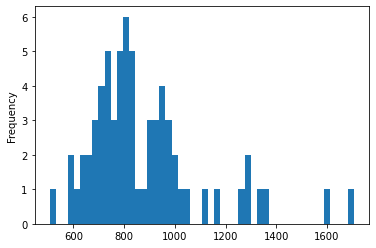

In [52]:
# Plot a histogram of the 2018 Average Monthly Rent

amr_spa['2018 Average Monthly Rent (Euros)'].plot.hist(bins=50)

This graph shows the frequency of neighborhoods in each price range for average monthly rent (2018). It's not super useful, but we can see some outliers on the high end of rent prices. 

In [53]:
amr_spa.head()

,c_barri,n_barri,geometry,2014 Average Monthly Rent (Euros),2014 Average Monthly Rent (Euros/m^2),2015 Average Monthly Rent (Euros),2015 Average Monthly Rent (Euros/m^2),2016 Average Monthly Rent (Euros),2016 Average Monthly Rent (Euros/m^2),2017 Average Monthly Rent (Euros),2017 Average Monthly Rent (Euros/m^2),2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2),2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2)
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",1157.9125,9.7025,1030.0475,12.1975,1177.1075,15.3125,1231.0100,16.6600,939.1125,12.0675,1200.150,13.775
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",1039.5050,13.5175,1100.4075,14.4050,1188.0025,15.9475,1353.5350,17.4475,1362.0175,17.1825,1369.950,16.825
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",940.0200,11.5575,1039.9675,12.6550,1123.6225,14.2175,1235.2425,15.3175,1285.5925,16.1000,1303.750,16.025
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",567.8525,8.9350,580.0100,9.5725,631.1025,10.6200,698.0075,11.6425,747.6450,11.8250,782.175,12.425
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",578.4075,10.4825,624.7375,10.9975,667.3925,12.2700,747.7150,13.8950,822.5525,14.0175,850.900,14.325


In [54]:
list(amr_spa)

['c_barri',
 'n_barri',
 'geometry',
 '2014 Average Monthly Rent (Euros)',
 '2014 Average Monthly Rent (Euros/m^2)',
 '2015 Average Monthly Rent (Euros)',
 '2015 Average Monthly Rent (Euros/m^2)',
 '2016 Average Monthly Rent (Euros)',
 '2016 Average Monthly Rent (Euros/m^2)',
 '2017 Average Monthly Rent (Euros)',
 '2017 Average Monthly Rent (Euros/m^2)',
 '2018 Average Monthly Rent (Euros)',
 '2018 Average Monthly Rent (Euros/m^2)',
 '2019 Average Monthly Rent (Euros)',
 '2019 Average Monthly Rent (Euros/m^2)']

In [55]:
amr_spa['Percent Change Average Monthly Rent 2014-2015']=round(
    (amr_spa['2015 Average Monthly Rent (Euros)']-amr_spa[
    '2014 Average Monthly Rent (Euros)'])/amr_spa['2014 Average Monthly Rent (Euros)']*100,2)
amr_spa['Percent Change Average Monthly Rent 2015-2016']=round(
    (amr_spa['2016 Average Monthly Rent (Euros)']-amr_spa[
    '2015 Average Monthly Rent (Euros)'])/amr_spa['2015 Average Monthly Rent (Euros)']*100,2)
amr_spa['Percent Change Average Monthly Rent 2016-2017']=round(
    (amr_spa['2017 Average Monthly Rent (Euros)']-amr_spa[
    '2016 Average Monthly Rent (Euros)'])/amr_spa['2016 Average Monthly Rent (Euros)']*100,2)
amr_spa['Percent Change Average Monthly Rent 2017-2018']=round(
    (amr_spa['2018 Average Monthly Rent (Euros)']-amr_spa[
    '2017 Average Monthly Rent (Euros)'])/amr_spa['2017 Average Monthly Rent (Euros)']*100,2)
amr_spa['Percent Change Average Monthly Rent 2018-2019']=round(
    (amr_spa['2019 Average Monthly Rent (Euros)']-amr_spa[
    '2018 Average Monthly Rent (Euros)'])/amr_spa['2018 Average Monthly Rent (Euros)']*100,2)

In [56]:
inflation = [1.0002, 1.0157, 1.011, 1.0118, 1.0079]

In [57]:
amr_spa['2015 Average Monthly Rent (Euros) - Adjusted']=amr_spa['2015 Average Monthly Rent (Euros)']/inflation[0]
amr_spa['2016 Average Monthly Rent (Euros) - Adjusted']=amr_spa[
    '2016 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1])
amr_spa['2017 Average Monthly Rent (Euros) - Adjusted']=amr_spa[
    '2017 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1]*inflation[2])
amr_spa['2018 Average Monthly Rent (Euros) - Adjusted']=amr_spa[
    '2018 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3])
amr_spa['2019 Average Monthly Rent (Euros) - Adjusted']=amr_spa[
    '2019 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3]*inflation[4])

amr_spa['2015 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_spa['2015 Average Monthly Rent (Euros/m^2)']/inflation[0]
amr_spa['2016 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_spa[
    '2016 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1])
amr_spa['2017 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_spa[
    '2017 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1]*inflation[2])
amr_spa['2018 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_spa[
    '2018 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3])
amr_spa['2019 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_spa[
    '2019 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3]*inflation[4])

In [58]:
amr_spa.head()

,c_barri,n_barri,geometry,2014 Average Monthly Rent (Euros),2014 Average Monthly Rent (Euros/m^2),2015 Average Monthly Rent (Euros),2015 Average Monthly Rent (Euros/m^2),2016 Average Monthly Rent (Euros),2016 Average Monthly Rent (Euros/m^2),2017 Average Monthly Rent (Euros),...,2015 Average Monthly Rent (Euros) - Adjusted,2016 Average Monthly Rent (Euros) - Adjusted,2017 Average Monthly Rent (Euros) - Adjusted,2018 Average Monthly Rent (Euros) - Adjusted,2019 Average Monthly Rent (Euros) - Adjusted,2015 Average Monthly Rent (Euros/m^2) - Adjusted,2016 Average Monthly Rent (Euros/m^2) - Adjusted,2017 Average Monthly Rent (Euros/m^2) - Adjusted,2018 Average Monthly Rent (Euros/m^2) - Adjusted,2019 Average Monthly Rent (Euros/m^2) - Adjusted
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",1157.9125,9.7025,1030.0475,12.1975,1177.1075,15.3125,1231.0100,...,1029.841532,1158.680836,1198.555427,903.690024,1145.829373,12.195061,15.072795,16.220773,11.612325,13.151522
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",1039.5050,13.5175,1100.4075,14.4050,1188.0025,15.9475,1353.5350,...,1100.187463,1169.405284,1317.850155,1310.643429,1307.943965,14.402120,15.697855,16.987511,16.534392,16.063475
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",940.0200,11.5575,1039.9675,12.6550,1123.6225,14.2175,1235.2425,...,1039.759548,1106.033101,1202.676340,1237.101111,1244.740278,12.652470,13.994937,14.913667,15.492723,15.299684
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",567.8525,8.9350,580.0100,9.5725,631.1025,10.6200,698.0075,...,579.894021,621.223102,679.605102,719.444505,746.772561,9.570586,10.453753,11.335555,11.378972,11.862625
4,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",578.4075,10.4825,624.7375,10.9975,667.3925,12.2700,747.7150,...,624.612577,656.945012,728.002105,791.526562,812.386963,10.995301,12.077923,13.528670,13.488773,13.676629


In [59]:
# Export dataframe to use in other files. 

amr_spa.to_csv (r'Data/barcelona rent data.csv', index = False, header=True)

In [60]:
# Export dataframe as geojson 
amr_spa.to_file('Data/barcelona_rent_data.geojson', driver='GeoJSON')

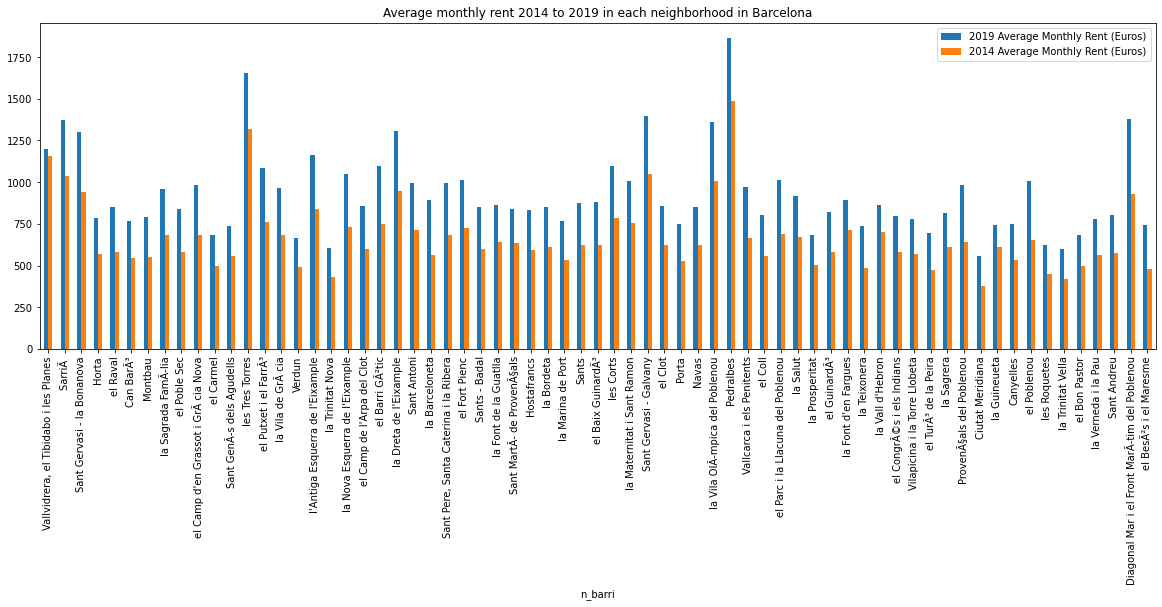

In [61]:
# Print a bar chart with the name of each neighborhood on the x-axis and the 2014-2019 Average Monthly Rent (Euros) on the 
# y axis. 

amr_spa.plot.bar(figsize = (20, 6), 
                  x = 'n_barri', 
                  y = {'2014 Average Monthly Rent (Euros)',
                      # '2015 Average Monthly Rent (Euros)',
                      # '2016 Average Monthly Rent (Euros)',
                      # '2017 Average Monthly Rent (Euros)',
                      # '2018 Average Monthly Rent (Euros)',
                       '2019 Average Monthly Rent (Euros)'}, 
                  title = 'Average monthly rent 2014 to 2019 in each neighborhood in Barcelona')
plt.savefig('Bar Chart - Average Monthly Rent for Neighborhoods in Barcelona, 2014 to 2019.png',bbox_inches='tight')

The bar graph above depicts rent increases in Barcelona from 2014 to 2019. We can see that rent increased in all neighborhoods, with only Vallvidrera (on the left) remaining approximately the same. 

Now we want to produce a line graph of the top five most expensive neighborhoods in Barcelona

In [62]:
# Data manipulation to produce a line graph
amr_data = amr_spa.set_index('n_barri')
amr_data.head()

,c_barri,geometry,2014 Average Monthly Rent (Euros),2014 Average Monthly Rent (Euros/m^2),2015 Average Monthly Rent (Euros),2015 Average Monthly Rent (Euros/m^2),2016 Average Monthly Rent (Euros),2016 Average Monthly Rent (Euros/m^2),2017 Average Monthly Rent (Euros),2017 Average Monthly Rent (Euros/m^2),...,2015 Average Monthly Rent (Euros) - Adjusted,2016 Average Monthly Rent (Euros) - Adjusted,2017 Average Monthly Rent (Euros) - Adjusted,2018 Average Monthly Rent (Euros) - Adjusted,2019 Average Monthly Rent (Euros) - Adjusted,2015 Average Monthly Rent (Euros/m^2) - Adjusted,2016 Average Monthly Rent (Euros/m^2) - Adjusted,2017 Average Monthly Rent (Euros/m^2) - Adjusted,2018 Average Monthly Rent (Euros/m^2) - Adjusted,2019 Average Monthly Rent (Euros/m^2) - Adjusted
n_barri,,,,,,,,,,,,,,,,,,,,,
"Vallvidrera, el Tibidabo i les Planes",22,"MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...",1157.9125,9.7025,1030.0475,12.1975,1177.1075,15.3125,1231.0100,16.6600,...,1029.841532,1158.680836,1198.555427,903.690024,1145.829373,12.195061,15.072795,16.220773,11.612325,13.151522
SarriÃ,23,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...",1039.5050,13.5175,1100.4075,14.4050,1188.0025,15.9475,1353.5350,17.4475,...,1100.187463,1169.405284,1317.850155,1310.643429,1307.943965,14.402120,15.697855,16.987511,16.534392,16.063475
Sant Gervasi - la Bonanova,25,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...",940.0200,11.5575,1039.9675,12.6550,1123.6225,14.2175,1235.2425,15.3175,...,1039.759548,1106.033101,1202.676340,1237.101111,1244.740278,12.652470,13.994937,14.913667,15.492723,15.299684
Horta,43,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...",567.8525,8.9350,580.0100,9.5725,631.1025,10.6200,698.0075,11.6425,...,579.894021,621.223102,679.605102,719.444505,746.772561,9.570586,10.453753,11.335555,11.378972,11.862625
el Raval,1,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",578.4075,10.4825,624.7375,10.9975,667.3925,12.2700,747.7150,13.8950,...,624.612577,656.945012,728.002105,791.526562,812.386963,10.995301,12.077923,13.528670,13.488773,13.676629


In [63]:
amr_data['2015 Average Monthly Rent (Euros) - Adjusted']=amr_data['2015 Average Monthly Rent (Euros)']/inflation[0]
amr_data['2016 Average Monthly Rent (Euros) - Adjusted']=amr_data[
    '2016 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1])
amr_data['2017 Average Monthly Rent (Euros) - Adjusted']=amr_data[
    '2017 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1]*inflation[2])
amr_data['2018 Average Monthly Rent (Euros) - Adjusted']=amr_data[
    '2018 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3])
amr_data['2019 Average Monthly Rent (Euros) - Adjusted']=amr_data[
    '2019 Average Monthly Rent (Euros)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3]*inflation[4])

amr_data['2015 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_data['2015 Average Monthly Rent (Euros/m^2)']/inflation[0]
amr_data['2016 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_data[
    '2016 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1])
amr_data['2017 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_data[
    '2017 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1]*inflation[2])
amr_data['2018 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_data[
    '2018 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3])
amr_data['2019 Average Monthly Rent (Euros/m^2) - Adjusted']=amr_data[
    '2019 Average Monthly Rent (Euros/m^2)']/(inflation[0]*inflation[1]*inflation[2]*inflation[3]*inflation[4])

In [64]:
amr_data_sample = amr_data[
    (amr_data['c_barri']==1)|
    (amr_data['c_barri']==2)|
    (amr_data['c_barri']==3)|
    (amr_data['c_barri']==4)|
    (amr_data['c_barri']==5)|
    (amr_data['c_barri']==6)|
    (amr_data['c_barri']==7)|
    (amr_data['c_barri']==8)|
    (amr_data['c_barri']==10)|
    (amr_data['c_barri']==11)|
    (amr_data['c_barri']==15)|
    (amr_data['c_barri']==31)|
    (amr_data['c_barri']==66)|
    (amr_data['c_barri']==67)|
    (amr_data['c_barri']==68)]

In [65]:
amr_data_sample

,c_barri,geometry,2014 Average Monthly Rent (Euros),2014 Average Monthly Rent (Euros/m^2),2015 Average Monthly Rent (Euros),2015 Average Monthly Rent (Euros/m^2),2016 Average Monthly Rent (Euros),2016 Average Monthly Rent (Euros/m^2),2017 Average Monthly Rent (Euros),2017 Average Monthly Rent (Euros/m^2),...,2015 Average Monthly Rent (Euros) - Adjusted,2016 Average Monthly Rent (Euros) - Adjusted,2017 Average Monthly Rent (Euros) - Adjusted,2018 Average Monthly Rent (Euros) - Adjusted,2019 Average Monthly Rent (Euros) - Adjusted,2015 Average Monthly Rent (Euros/m^2) - Adjusted,2016 Average Monthly Rent (Euros/m^2) - Adjusted,2017 Average Monthly Rent (Euros/m^2) - Adjusted,2018 Average Monthly Rent (Euros/m^2) - Adjusted,2019 Average Monthly Rent (Euros/m^2) - Adjusted
n_barri,,,,,,,,,,,,,,,,,,,,,
el Raval,1,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",578.4075,10.4825,624.7375,10.9975,667.3925,12.2700,747.7150,13.8950,...,624.612577,656.945012,728.002105,791.526562,812.386963,10.995301,12.077923,13.528670,13.488773,13.676629
la Sagrada FamÃ­lia,6,"MULTIPOLYGON (((2.18451 41.40716, 2.18564 41.4...",680.3875,10.4650,712.3500,11.2025,774.5025,12.1900,874.7025,13.3325,...,712.207558,762.378291,851.641683,876.178413,916.262508,11.200260,11.999175,12.981000,13.200088,13.819839
el Poble Sec,11,"MULTIPOLYGON (((2.15097 41.37642, 2.15166 41.3...",582.5225,10.1900,611.6750,11.0775,669.0750,12.2725,748.1525,13.6525,...,611.552689,658.601173,728.428070,771.631404,799.879889,11.075285,12.080384,13.292563,13.332402,13.700497
la Vila de GrÃ cia,31,"MULTIPOLYGON (((2.16639 41.40210, 2.16526 41.4...",681.6325,11.2500,731.2550,12.3900,798.6800,13.4700,859.3625,15.0025,...,731.108778,786.177312,836.706110,881.314587,919.365408,12.387522,13.259138,14.606971,14.042084,14.416551
l'Antiga Esquerra de l'Eixample,8,"MULTIPOLYGON (((2.16527 41.38743, 2.16526 41.3...",841.9900,10.5050,908.3400,11.3800,976.6325,12.6650,1056.3175,13.6825,...,908.158368,961.344110,1028.468552,1070.013061,1108.642309,11.377724,12.466740,13.321772,13.517641,13.819839
el Barri GÃ²tic,2,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3...",748.5000,10.5400,782.9850,11.2900,866.3125,13.0100,973.7675,14.1900,...,782.828434,852.751080,948.094915,984.519214,1049.042760,11.287742,12.806339,13.815892,13.253014,13.628892
la Dreta de l'Eixample,7,"MULTIPOLYGON (((2.17447 41.40111, 2.17543 41.4...",945.2175,10.0750,1008.3775,11.2250,1135.7550,12.8325,1193.3650,13.5025,...,1008.175865,1117.975676,1161.902906,1205.639337,1248.057994,11.222755,12.631618,13.146518,13.433441,13.748234
Sant Antoni,10,"MULTIPOLYGON (((2.16600 41.38704, 2.16520 41.3...",711.3675,10.0200,764.1300,10.8275,841.3300,12.0650,898.2600,12.9475,...,763.977205,828.159661,874.578109,899.241880,949.248722,10.825335,11.876132,12.606150,12.670834,13.246996
la Barceloneta,3,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3...",563.8125,15.1525,602.7200,16.3325,667.7600,18.2125,746.3100,19.8450,...,602.599480,657.306759,726.634146,865.266147,854.467061,16.329234,17.927398,19.321803,16.279387,16.612449


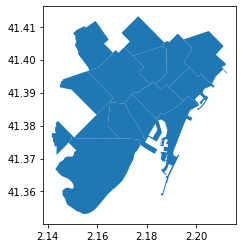

In [66]:
amr_data_sample.plot()

In [ ]:
amr_data.head(65)

In [ ]:
list(amr_data)

In [67]:
amr_data_tr = amr_data[['2014 Average Monthly Rent (Euros)',
 '2015 Average Monthly Rent (Euros) - Adjusted',
 '2016 Average Monthly Rent (Euros) - Adjusted',
 '2017 Average Monthly Rent (Euros) - Adjusted',
 '2018 Average Monthly Rent (Euros) - Adjusted',
 '2019 Average Monthly Rent (Euros) - Adjusted']]

amr_data_m2_tr = amr_data[[
 '2014 Average Monthly Rent (Euros/m^2)',
 '2015 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2016 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2017 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2018 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2019 Average Monthly Rent (Euros/m^2) - Adjusted']]

In [68]:
# swap axes in order to plot the line graph 
amr_data_swap = amr_data_tr.swapaxes("index", "columns")
amr_data_m2_swap = amr_data_m2_tr.swapaxes("index", "columns")

In [69]:
amr_data_swap

n_barri,"Vallvidrera, el Tibidabo i les Planes",SarriÃ,Sant Gervasi - la Bonanova,Horta,el Raval,Can BarÃ³,Montbau,la Sagrada FamÃ­lia,el Poble Sec,el Camp d'en Grassot i GrÃ cia Nova,...,la Guineueta,Canyelles,el Poblenou,les Roquetes,la Trinitat Vella,el Bon Pastor,la Verneda i la Pau,Sant Andreu,Diagonal Mar i el Front MarÃ­tim del Poblenou,el BesÃ²s i el Maresme
2014 Average Monthly Rent (Euros),1157.912500,1039.505000,940.020000,567.852500,578.407500,543.782500,549.197500,680.387500,582.522500,682.210000,...,613.822500,534.162500,654.545000,451.142500,422.060000,495.740000,565.060000,576.150000,927.835000,481.307500
2015 Average Monthly Rent (Euros) - Adjusted,1029.841532,1100.187463,1039.759548,579.894021,624.612577,549.167666,627.554489,712.207558,611.552689,725.377425,...,570.330934,577.174565,732.808438,463.259848,438.274845,536.562687,609.835533,612.245051,1032.448510,506.638672
2016 Average Monthly Rent (Euros) - Adjusted,1158.680836,1169.405284,1106.033101,621.223102,656.945012,623.169646,631.167456,762.378291,658.601173,790.587181,...,615.777209,617.074084,780.979966,483.909322,472.052877,535.031322,595.521833,648.976732,1124.671689,530.520557
2017 Average Monthly Rent (Euros) - Adjusted,1198.555427,1317.850155,1202.676340,679.605102,728.002105,666.736071,705.206856,851.641683,728.428070,840.785644,...,629.358192,663.233416,875.731867,519.926394,487.061317,608.814476,670.455360,714.008524,1080.713850,594.394930
2018 Average Monthly Rent (Euros) - Adjusted,903.690024,1310.643429,1237.101111,719.444505,791.526562,710.334111,709.376641,876.178413,771.631404,875.812746,...,685.762268,689.568089,926.611555,580.993935,565.291916,658.183297,711.635596,735.348603,1121.615374,659.696484
2019 Average Monthly Rent (Euros) - Adjusted,1145.829373,1307.943965,1244.740278,746.772561,812.386963,733.740381,757.513369,916.262508,799.879889,937.911203,...,710.850527,712.521319,960.657847,592.940326,574.776426,652.253453,743.240029,768.683809,1319.281484,706.840625


In [ ]:
amr_data_swap.plot.line(figsize = (20,12), 
                             title='Average Monthly Rent for Neighborhoods in Barcelona (Highest 2019 Rent), 2014-2019', 
                             #fontsize=12,
                             #xlabel={'2014 Average Monthly Rent (Euros)':'2014','2015 Average Monthly Rent (Euros)':'2015'},
                             #rot=90,
                             legend=True)
plt.savefig('Line Graph - Average Monthly Rent for Neighborhoods in Barcelona, 2014-2019.png',bbox_inches='tight')

In [ ]:

fig = px.line(amr_data_swap, 
              #x={'2014 Average Monthly Rent (Euros)',
                        #'2015 Average Monthly Rent (Euros)',
                        #'2016 Average Monthly Rent (Euros)',
                        #'2017 Average Monthly Rent (Euros)',
                        #'2018 Average Monthly Rent (Euros)',
                        #'2019 Average Monthly Rent (Euros)'}, 
              #y="n_barri", 
              color="n_barri",
              #line_group="country", 
              hover_name="n_barri")
fig.show()

In [ ]:
list(amr_data_swap)

In [70]:
amr_data_swap_sample = amr_data_swap[[
    'el Raval',
    'el Barri GÃ²tic',
    'la Barceloneta',
    'Sant Pere, Santa Caterina i la Ribera',
    'el Fort Pienc',
    'la Sagrada FamÃ\xadlia',
    "la Dreta de l'Eixample",
    "l'Antiga Esquerra de l'Eixample",
    'Sant Antoni',
    'el Poble Sec',
    'Hostafrancs',
    'la Vila de GrÃ\xa0cia',
    'el Parc i la Llacuna del Poblenou',
    'la Vila OlÃ\xadmpica del Poblenou',
    'el Poblenou'
    ]]

amr_data_m2_swap_sample = amr_data_m2_swap[[
    'el Raval',
    'el Barri GÃ²tic',
    'la Barceloneta',
    'Sant Pere, Santa Caterina i la Ribera',
    'el Fort Pienc',
    'la Sagrada FamÃ\xadlia',
    "la Dreta de l'Eixample",
    "l'Antiga Esquerra de l'Eixample",
    'Sant Antoni',
    'el Poble Sec',
    'Hostafrancs',
    'la Vila de GrÃ\xa0cia',
    'el Parc i la Llacuna del Poblenou',
    'la Vila OlÃ\xadmpica del Poblenou',
    'el Poblenou'
    ]]

In [ ]:
# Create a line graph of adjusted rent 
fig = px.line(amr_data_swap_sample,  
              color="n_barri",
              labels={'index':'','value':'Euros'},
              title='2014-2019 Adjusted Rent (Euros) for Neighborhoods with Top Airbnb Total Counts per 1000 Dwellings', 
              hover_name="n_barri")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.update_layout({
    #'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.write_html("Output/2014-2019AdjustedRent_Top_Total_Airbnb_per_1000.html")
fig.show()

In [ ]:
# Create a line graph of adjusted rent/m2
fig = px.line(amr_data_m2_swap_sample, 
              color="n_barri",
              labels={'index':'','value':'Euros/m^2'},
              title='2014-2019 Adjusted Rent (Euros/m^2) for Neighborhoods with Top Airbnb Total Counts per 1000 Dwellings',
              hover_name="n_barri")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.update_layout({
    #'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.write_html("Output/2014-2019AdjustedRentm2_Top_Total_Airbnb_per_1000.html")
fig.show()

In [ ]:
#df = px.data.gapminder().query("continent != 'Asia'") # remove Asia for visibility
fig = px.line(amr_data_m2_swap, 
              #x={'2014 Average Monthly Rent (Euros)',
                        #'2015 Average Monthly Rent (Euros)',
                        #'2016 Average Monthly Rent (Euros)',
                        #'2017 Average Monthly Rent (Euros)',
                        #'2018 Average Monthly Rent (Euros)',
                        #'2019 Average Monthly Rent (Euros)'}, 
              #y="n_barri", 
              color="n_barri",
              #line_group="country", 
              hover_name="n_barri")
fig.show()

This graph needs some work. But it does show us increases in rent for the top 5 most expensive neighborhoods in Barcelona. We still need to normalize this data to understand the percent increase in rent, and compare that to what would be considered unreasonable. 

### Compare 2018 rental demand and offer price data

We want to compare the demand and offer rental prices for 2018, as well as the 2018 average monthly rent. 

In [71]:
# create dataframe to use for stats
adorp2018_data = adorp2018_spa[['c_barri','n_barri','2018 Average Demand Rental Price (Euros)','2018 Average Offer Rental Price (Euros)','2018 Average Monthly Rent (Euros)']]

In [72]:
# for consistency, we're using the same five barris as the average monthly rent data. This was a challenge. 
adorp2018_data_topbarri = adorp2018_data.loc[(adorp2018_data['n_barri'] == 'Pedralbes') | (adorp2018_data['n_barri'] == 'les Tres Torres') |(adorp2018_data['n_barri'] == 'Sant Gervasi - Galvany')|(adorp2018_data['c_barri'] == 69)|(adorp2018_data['c_barri'] == 23)]

In [73]:
adorp2018_data_topbarri

,c_barri,n_barri,2018 Average Demand Rental Price (Euros),2018 Average Offer Rental Price (Euros),2018 Average Monthly Rent (Euros)
1,23,SarriÃ,1389.21,1875.03,1362.0175
12,24,les Tres Torres,1667.37,2475.54,1598.6000
36,26,Sant Gervasi - Galvany,1362.47,2076.07,1346.9250
41,21,Pedralbes,1719.74,2611.63,1707.0125
64,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,927.74,2050.20,1165.5800


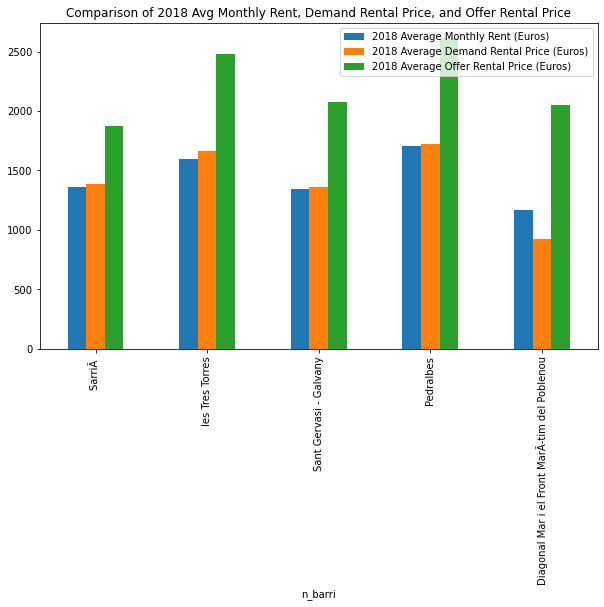

In [74]:
adorp2018_data_topbarri.plot.bar(figsize=(10,6),
                                 title='Comparison of 2018 Avg Monthly Rent, Demand Rental Price, and Offer Rental Price',
                                 x='n_barri',
                                 y={'2018 Average Demand Rental Price (Euros)',
                                    '2018 Average Offer Rental Price (Euros)',
                                    '2018 Average Monthly Rent (Euros)'},
                                rot=90)

plt.savefig('Bar Chart - Comparison of 2018 Average Monthly Rent, Average Demand Rental Price, and Average Offer Rental Price.png',bbox_inches='tight')


This bar chart gives a good comparison of the average rental price offered, average rental price demanded, and the average monthly rent in the top five most expensive neighborhoods. This comparison helps us see the difference between prices being offered and what people are able to pay. 

## Create maps

Try some overall maps with the Average Monthly Rent data. Create sets of subplots side-by-side.

In [ ]:
# Test a map! Here's a map of Average Monthly Rent by neighborhood. A beautiful moment, really.
indicators = ['2014 Average Monthly Rent (Euros)',
             '2015 Average Monthly Rent (Euros)',
             '2016 Average Monthly Rent (Euros)',
             '2017 Average Monthly Rent (Euros)',
             '2018 Average Monthly Rent (Euros)',
             '2019 Average Monthly Rent (Euros)',]

for indicator in indicators:
    ax = amr_spa.plot(figsize=(10,10),column=indicator,cmap='viridis',legend=True)
    ax.set_title(indicator)
    ax.axis('off')

In [ ]:
bb_n = bb.set_index('n_barri')

In [ ]:
# Plot an interactive map of the barris

fig = px.choropleth(bb_n,
                   geojson=bb_n.geometry,                   
                    locations=bb_n.index,
                  color="c_barri",
                    color_continuous_scale="YlOrRd",
                  projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.write_html("Barri Map.html")
plt.savefig('Barri Map.png',bbox_inches='tight')
fig.show()

This is cool! But showing a chloropleth by barri doesn't actually tell us anything. And we just have a floating Barcelona. 

In [ ]:
bb_n.crs

In [ ]:
# Create a map with a mapbox background 

fig = px.choropleth_mapbox(bb_n, geojson=bb_n.geometry, color="c_barri",
                           color_continuous_scale="Viridis",
                           locations=bb_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri "},
                           center={"lat": 41.3851, "lon": 2.1734},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("Barri Map with Background.html")
#plt.savefig('Barri Map with Background.png',bbox_inches='tight')
fig.show()

We've added a background! Looks great. Let's get some real data in there. 

In [ ]:
# Create a map that shows 2019 Average Monthly rent, and is interactive

# Index the geodataframe by n_barri in order to use the neighborhood names for the interactive labels
amr_spa_n = amr_spa.set_index('n_barri')

fig = px.choropleth_mapbox(amr_spa_n, geojson=amr_spa_n.geometry, color="2019 Average Monthly Rent (Euros)",
                           color_continuous_scale="Greens",
                           locations=amr_spa_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri"},
                           center={"lat": 41.3851, "lon": 2.1734},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("2019 Average Monthly Rent (Euros) Map.html")
fig.show()

In [ ]:
# Create a map that shows 2019 Average Monthly rent, and is interactive

# Index the geodataframe by n_barri in order to use the neighborhood names for the interactive labels
amr_spa_n = amr_spa.set_index('n_barri')

fig = px.choropleth_mapbox(amr_spa_n, geojson=amr_spa_n.geometry, color="2019 Average Monthly Rent (Euros)",
                           color_continuous_scale="Oranges",
                           locations=amr_spa_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri"},
                           center={"lat": 41.3851, "lon": 2.1734},
                           opacity=0.7,
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("2019 Average Monthly Rent (Euros) Map_Orange.html")
fig.show()

Now that is a map. We've lost some of the barris based on removing the null data earlier. This map gives a good depiction of average monthly rents across the city though, with a cluster of western neighborhoods that have higher rent prices, and neighborhoods to the north with lower rent prices.

It will be interesting to compare this to housing scarcity data (tourist housing, empty dwellings, housing in poor condition). 

### Create subplots to compare multiple data

We've learned how to compare subplots at the same legend "bins", so we've implemented that here. 

In [ ]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# name each subplot
ax1, ax2, ax3 = axs

# Left map
adorp2018_spa.plot(column = '2018 Average Monthly Rent (Euros)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            scheme='user_defined', 
            classification_kwds={'bins':[400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600]},
            #k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = False)
            #legend_kwds={'orientation': "horizontal"})
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("2018 Average Monthly Rent in Barcelona") # add a title to ax1


# Middle map
adorp2018_spa.plot(column = '2018 Average Demand Rental Price (Euros)', 
            cmap = 'viridis', 
            scheme='user_defined', 
            classification_kwds={'bins':[400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600]}, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = False)
                 # legend_kwds={'orientation': "horizontal"})

ax2.axis("off")
ax2.set_title("2018 Average Demand Rental Price in Barcelona")

# Right map
adorp2018_spa.plot(column = '2018 Average Offer Rental Price (Euros)', 
            cmap = 'viridis', 
            scheme='user_defined', 
            classification_kwds={'bins':[400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600]},
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax3, # this assigns the map to the subplot
            legend = True,
            legend_kwds={'loc':"upper right", 'bbox_to_anchor':(1.75, 1.0), 'title':"Legend\n", 'frameon':False})

ax3.axis("off")
ax3.set_title("2018 Average Offer Rental Price in Barcelona")

These maps give a visual spatial comparison between 2018 average monthly rent, 2018 average demand rental price, and 2018 average offer rental price. It's a bit difficult to see the differences in a chloropleth map, so we may just stick with the bar graphs. But still an interesting comparison. 

Also - pretty proud of this legend action over here --> 
Just need to figure out how to set a lower bound at zero. 

In [ ]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# Left map
amr_spa.plot(column = '2018 Average Monthly Rent (Euros)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            scheme='user_defined', 
            classification_kwds={'bins':[400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600]}, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = False)
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("Average 2018 Monthly Rent / m^2 in Barcelona") # add a title to ax1

# Right map
amr_spa.plot(column = '2019 Average Monthly Rent (Euros)', 
            cmap = 'viridis', 
            scheme='user_defined', 
            classification_kwds={'bins':[400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600]},
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True,
            legend_kwds={'loc':"upper right", 'bbox_to_anchor':(1.5, 1.0), 'title':"Legend\n", 'frameon':False})

ax2.axis("off")
ax2.set_title("Average 2019 Monthly Rent / m^2 in Barcelona")

These maps show slight differences in the rental prices between 2018 and 2019. It will be interesting to compare the percent increases in rental prices and whether certain neighborhoods are increasing at a higher rate. We'd also like to compare these maps with maps of tourist dwellings. 

### End of file

This notebook file is an updated + clean version of our midterm assignment. 

We have a separate file that includes functions and loops to clean up population data in Barcelona. 

Division of Work: We worked together to work through creating functions and using for loops to clean our data more efficiently. Tiffany created the population data notebook, which cleans the Barcelona population data file and outputs a clean version to be used in other notebooks. I updated this notebook from our midterm assignment, cleaned up the processes, and edited some of the subplot maps. We shared responsiblity in researching and learning how to properly use functions and loops. 